<a href="https://colab.research.google.com/github/u1-byte/SmartCropYieldsPrediction/blob/main/Machine%20Learning/Code/%5BKelembaban%5DML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Upload file dataset dari lokal
uploaded = files.upload()

Saving Cuaca.csv to Cuaca.csv


# **Provinsi Jatim**

In [50]:
# Input data Jatim
input_kelembaban_ratarata = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_kelembaban_ratarata.append(float(row[2]))
    number+=1

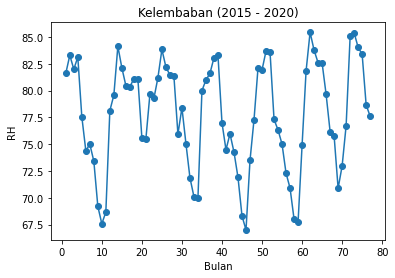

In [51]:
# Grafik garis dari Suhu
plt.plot(number_of_input,input_kelembaban_ratarata,marker='o')
plt.title('Kelembaban (2015 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

In [52]:
# Input dari data pada database
dataset = []
counter=0

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    dataset.append([])
    dataset[counter].append(float(row[2]))
    counter+=1

dataset = np.array(dataset)

print(dataset)

[[81.61]
 [83.3 ]
 [82.  ]
 [83.13]
 [77.57]
 [74.4 ]
 [75.  ]
 [73.42]
 [69.2 ]
 [67.57]
 [68.67]
 [78.13]
 [79.58]
 [84.14]
 [82.13]
 [80.47]
 [80.37]
 [81.1 ]
 [81.1 ]
 [75.58]
 [75.5 ]
 [79.65]
 [79.27]
 [81.2 ]
 [83.84]
 [82.21]
 [81.45]
 [81.33]
 [75.94]
 [78.4 ]
 [75.06]
 [71.87]
 [70.1 ]
 [70.  ]
 [80.  ]
 [81.  ]
 [81.61]
 [83.07]
 [83.29]
 [77.  ]
 [74.48]
 [75.97]
 [74.26]
 [71.9 ]
 [68.3 ]
 [67.  ]
 [73.5 ]
 [77.29]
 [82.13]
 [81.93]
 [83.7 ]
 [83.6 ]
 [77.31]
 [76.33]
 [75.  ]
 [72.29]
 [70.9 ]
 [68.  ]
 [67.73]
 [74.89]
 [81.84]
 [85.45]
 [83.77]
 [82.6 ]
 [82.58]
 [79.66]
 [76.17]
 [75.77]
 [70.88]
 [72.97]
 [76.73]
 [85.06]
 [85.39]
 [84.04]
 [83.39]
 [78.66]
 [77.61]]


In [53]:
# Normalisasi dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [54]:
# Fungsi membuat sequence
def buat_sequences(dataset, window_size):
    input = []
    output = []

    for i in range(len(dataset)-window_size+1):
        window = dataset[i:(i+window_size-4), 0]
        input.append(window)
        output.append(dataset[(i+window_size-4):i+window_size, 0])
    return np.array(input),np.array(output)

window_size = 16
dataInput, dataOutput = buat_sequences(dataset, window_size)

print(len(dataInput))
print(len(dataOutput))

62
62


In [55]:
# Bagi data untuk training dan testing
input_train, input_test, output_train, output_test = train_test_split(dataInput, dataOutput, test_size=0.1, shuffle=False)

print(len(input_train))
print(len(input_test))

55
7


In [56]:
# Ubah dimensinya untuk disesuaikan dengan model
input_train = input_train.reshape((input_train.shape[0], 1, 1, 1, window_size-4))
input_test = input_test.reshape((input_test.shape[0], 1, 1, 1, window_size-4))

print(input_test)

[[[[[0.28672087 0.21138211 0.05420054 0.0395664  0.42764228 0.80433604
     1.         0.90894309 0.84552846 0.84444444 0.68617886 0.49701897]]]]



 [[[[0.21138211 0.05420054 0.0395664  0.42764228 0.80433604 1.
     0.90894309 0.84552846 0.84444444 0.68617886 0.49701897 0.47533875]]]]



 [[[[0.05420054 0.0395664  0.42764228 0.80433604 1.         0.90894309
     0.84552846 0.84444444 0.68617886 0.49701897 0.47533875 0.2102981 ]]]]



 [[[[0.0395664  0.42764228 0.80433604 1.         0.90894309 0.84552846
     0.84444444 0.68617886 0.49701897 0.47533875 0.2102981  0.32357724]]]]



 [[[[0.42764228 0.80433604 1.         0.90894309 0.84552846 0.84444444
     0.68617886 0.49701897 0.47533875 0.2102981  0.32357724 0.52737127]]]]



 [[[[0.80433604 1.         0.90894309 0.84552846 0.84444444 0.68617886
     0.49701897 0.47533875 0.2102981  0.32357724 0.52737127 0.97886179]]]]



 [[[[1.         0.90894309 0.84552846 0.84444444 0.68617886 0.49701897
     0.47533875 0.2102981  0.32357724 0.527

In [57]:
#model machine learning
model = tf.keras.models.Sequential([
  tf.keras.layers.ConvLSTM2D(filters=512, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, window_size-4)),   
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error',metrics=["mae"])

model.summary()

#fit the model
fitting_history = model.fit(input_train, output_train, validation_split=0.1, verbose=2, epochs=300)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_2 (ConvLSTM2D)  (None, 1, 1, 512)         1075200   
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                

<Figure size 432x288 with 0 Axes>

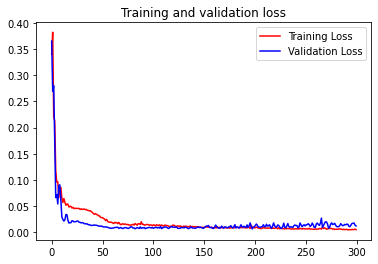

<Figure size 432x288 with 0 Axes>

In [58]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

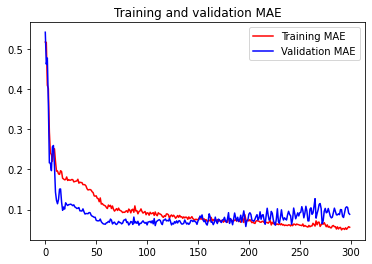

<Figure size 432x288 with 0 Axes>

In [59]:
# Grafik training and validation MAE
training_mae=fitting_history.history['mae']
validation_mae=fitting_history.history['val_mae']
epochs=range(len(training_mae))

plt.plot(epochs, training_mae, 'r', label="Training MAE")
plt.plot(epochs, validation_mae, 'b', label="Validation MAE")
plt.title('Training and validation MAE')
plt.legend(loc=0)
plt.figure()

In [60]:
# Menghitung nilai MSE dan MAE
mse_score, mae_score = model.evaluate(input_test, output_test)
print('Nilai Mean Squared Error (MSE) : ', mse_score)
print('Nilai Mean Absolute Error (MAE) : ', mae_score)

1/1 [==============================] - 0s 20ms/step - loss: 0.1255 - mae: 0.2546
Nilai Mean Squared Error (MSE) :  0.1254931539297104
Nilai Mean Absolute Error (MAE) :  0.25464317202568054


In [61]:
# Simpan model
model.save('model-kelembaban.h5')

# **Testing Model**

In [62]:
# Load the model
model = tf.keras.models.load_model('model-kelembaban.h5')

In [63]:
#Prediksi Data
data_prediksi = model.predict(input_test)

In [64]:
print(data_prediksi)
print("-------")
print(output_test)

[[0.34442976 0.2373195  0.11990268 0.11095951]
 [0.27896264 0.12344182 0.00327551 0.26145825]
 [0.13854964 0.03008442 0.15504265 0.56279767]
 [0.03085947 0.11968085 0.6579508  0.7749247 ]
 [0.66518366 0.8739525  0.9707267  0.932049  ]
 [0.83563507 0.91127867 0.8889764  0.7659595 ]
 [0.8895258  0.85581815 0.7288609  0.5154108 ]]
-------
[[0.47533875 0.2102981  0.32357724 0.52737127]
 [0.2102981  0.32357724 0.52737127 0.97886179]
 [0.32357724 0.52737127 0.97886179 0.99674797]
 [0.52737127 0.97886179 0.99674797 0.92357724]
 [0.97886179 0.99674797 0.92357724 0.88834688]
 [0.99674797 0.92357724 0.88834688 0.63197832]
 [0.92357724 0.88834688 0.63197832 0.57506775]]


In [65]:
# Inverse transform data min max
data_prediksi = scaler.inverse_transform(data_prediksi)
output_test = scaler.inverse_transform(output_test)

In [66]:
print(data_prediksi)
print("-------")
print(output_test)

[[73.35473  71.37855  69.212204 69.0472  ]
 [72.14686  69.2775   67.06043  71.823906]
 [69.556244 67.55505  69.860535 77.38361 ]
 [67.56936  69.208115 79.13919  81.29736 ]
 [79.27264  83.12442  84.909904 84.196304]
 [82.41747  83.813095 83.40162  81.13195 ]
 [83.41175  82.78985  80.44749  76.50933 ]]
-------
[[75.77 70.88 72.97 76.73]
 [70.88 72.97 76.73 85.06]
 [72.97 76.73 85.06 85.39]
 [76.73 85.06 85.39 84.04]
 [85.06 85.39 84.04 83.39]
 [85.39 84.04 83.39 78.66]
 [84.04 83.39 78.66 77.61]]


[75.77000000000001, 70.88, 72.97, 76.73]
[1, 2, 3, 4]
[73.35473, 71.37855, 69.212204, 69.0472]
[1, 2, 3, 4]


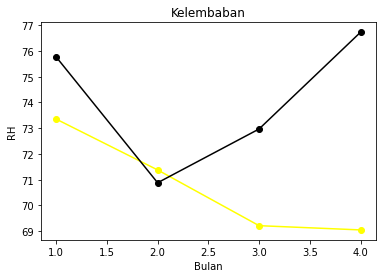

In [67]:
temp_test=[]
number=[]
count=1

for j in output_test[0]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[0]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[70.88, 72.97, 76.73, 85.06]
[1, 2, 3, 4]
[72.14686, 69.2775, 67.06043, 71.823906]
[1, 2, 3, 4]


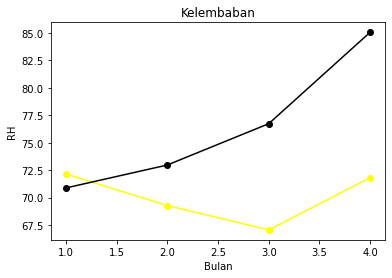

In [68]:
temp_test=[]
number=[]
count=1

for j in output_test[1]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[1]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[72.97, 76.73, 85.06, 85.39]
[1, 2, 3, 4]
[69.556244, 67.55505, 69.860535, 77.38361]
[1, 2, 3, 4]


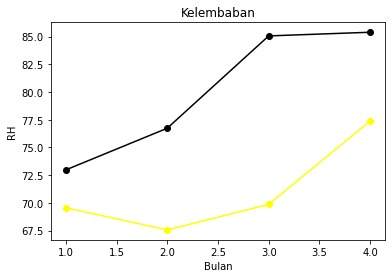

In [69]:
temp_test=[]
number=[]
count=1

for j in output_test[2]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[2]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[76.73, 85.06, 85.39, 84.04]
[1, 2, 3, 4]
[67.56936, 69.208115, 79.13919, 81.29736]
[1, 2, 3, 4]


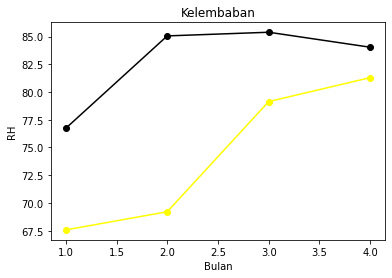

In [70]:
temp_test=[]
number=[]
count=1

for j in output_test[3]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[3]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[85.06, 85.39, 84.04, 83.39]
[1, 2, 3, 4]
[79.27264, 83.12442, 84.909904, 84.196304]
[1, 2, 3, 4]


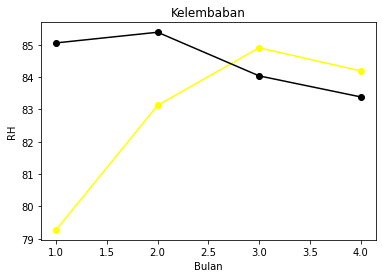

In [71]:
temp_test=[]
number=[]
count=1

for j in output_test[4]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[4]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[85.39, 84.04, 83.39, 78.66]
[1, 2, 3, 4]
[82.41747, 83.813095, 83.40162, 81.13195]
[1, 2, 3, 4]


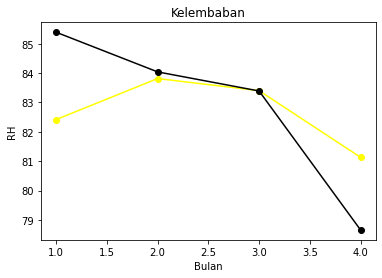

In [72]:
temp_test=[]
number=[]
count=1

for j in output_test[5]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[5]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

[84.04, 83.39, 78.66, 77.61000000000001]
[1, 2, 3, 4]
[83.41175, 82.78985, 80.44749, 76.50933]
[1, 2, 3, 4]


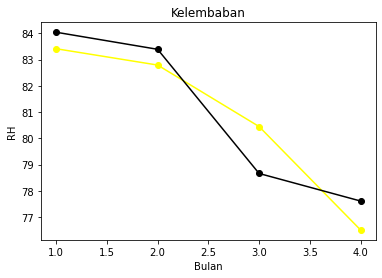

In [73]:
temp_test=[]
number=[]
count=1

for j in output_test[6]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[6]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Kelembaban')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()